In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from opstool import gm

# baseline corr

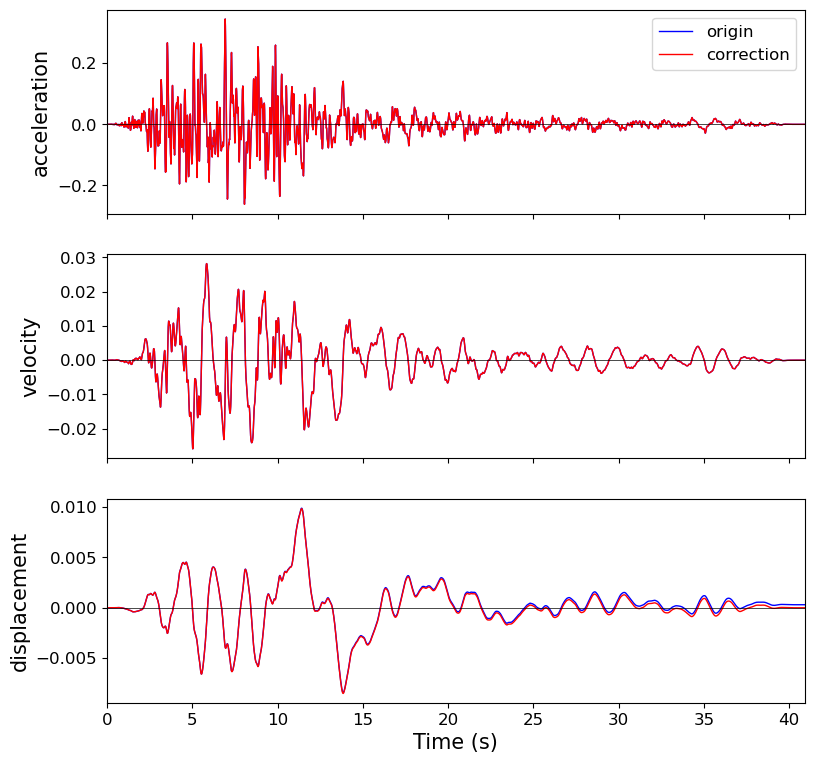

In [3]:
ts, acc = gm.load_gm_examples('Kobe')
dt = ts[1] - ts[0]
acc_corr, vel_corr, disp_corr = gm.baselinecorr(ts, acc, poly_degree=1, plot=True)


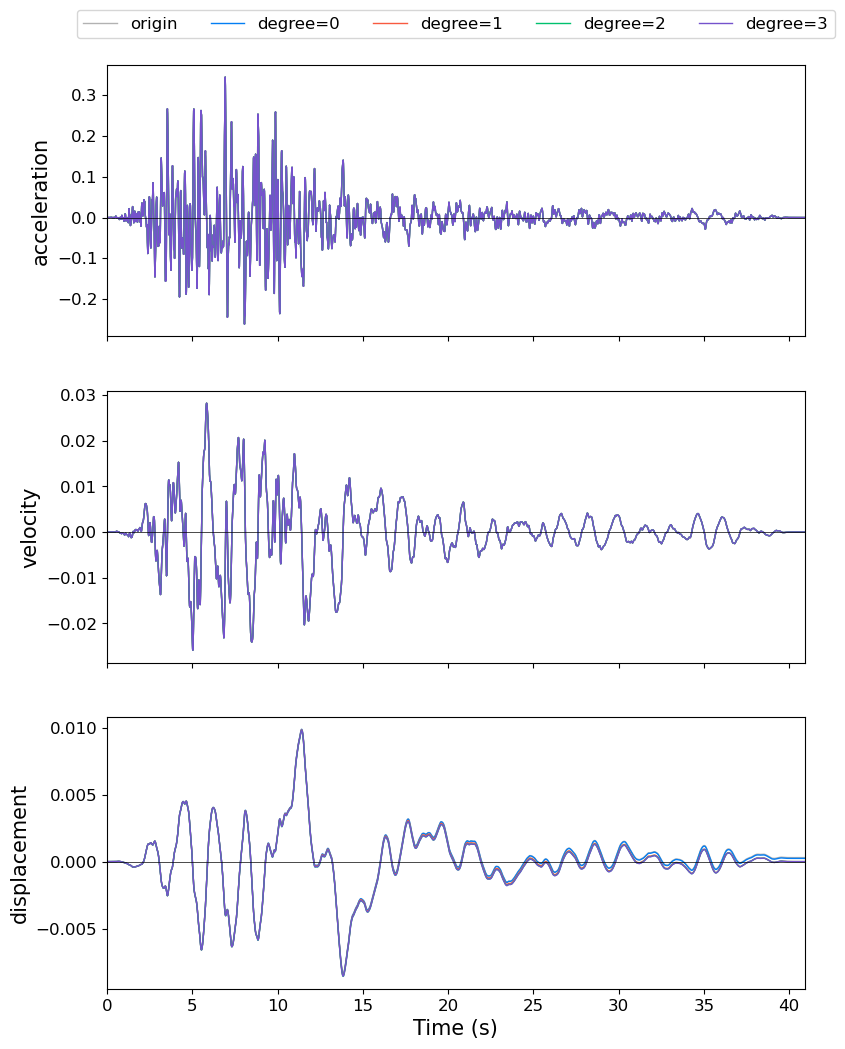

In [4]:
vel = cumulative_trapezoid(acc, ts, initial=0)
disp = cumulative_trapezoid(vel, ts, initial=0)

plot_obj_ori = [acc, vel, disp]
plot_obj_corr = []
degrees = [0, 1, 2, 3]
for i, degree in enumerate(degrees):
    acc_corr, vel_corr, disp_corr = gm.baselinecorr(
        ts, acc, degree, plot=False)
    plot_obj_corr.append([acc_corr, vel_corr, disp_corr])
colors = ['#037ef3', '#f85a40', '#00c16e', '#7552cc']
titles = ['acceleration', 'velocity', 'displacement']
fig, axs = plt.subplots(3, 1, figsize=(9, 12), sharex=True)
for j in range(3):
    ax = axs[j]
    ax.plot(ts, plot_obj_ori[j], c='gray',
            lw=1, alpha=0.6, label="origin")
    for k, degree in enumerate(degrees):
        ax.plot(ts, plot_obj_corr[k][j], c=colors[k],
                lw=1, label=f"degree={degree}")
    ax.hlines(0, np.min(ts), np.max(ts), lw=0.5, colors='k')
    ax.set_xlim(np.min(ts), np.max(ts))
    ax.grid(False)
    ax.set_ylabel(titles[j], fontsize=15)
    ax.tick_params(labelsize=12)
axs[0].legend(fontsize=12, ncol=5, loc='center',
                bbox_to_anchor=(0.5, 1.15))
axs[-1].set_xlabel("Time (s)", fontsize=15)
plt.show()

# freq filter

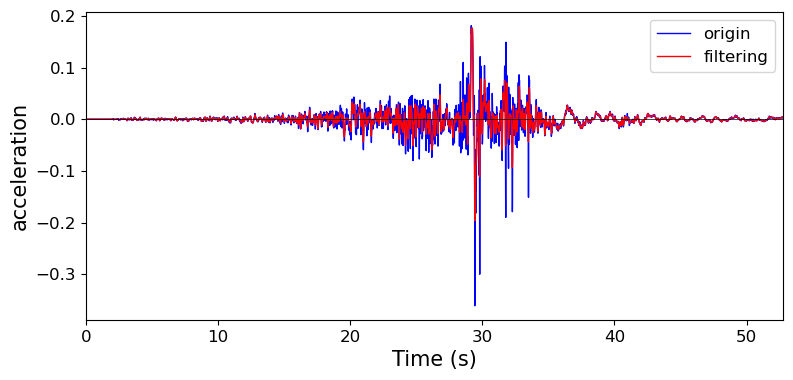

In [5]:
ts, acc = gm.load_gm_examples('ChiChi')
dt = ts[1] - ts[0]
acc2 = gm.freq_filt(dt, acc,
                    ftype='Butterworth',  # 'Butterworth', 'Chebyshev', 'Bessel'
                    btype='lowpass',  # 'lowpass', 'highpass', 'bandpass', 'bandstop'
                    order=4,
                    freq1=9,
                    freq2=20,
                    rp=3,
                    plot=True)

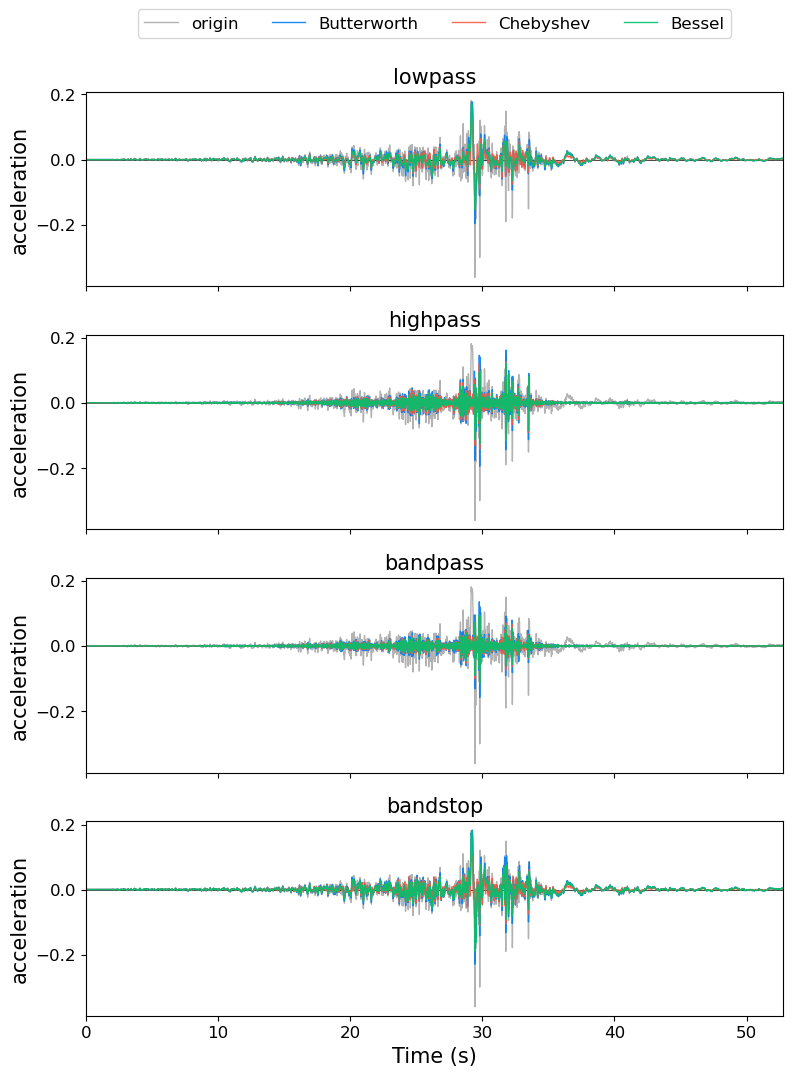

In [6]:

colors = ['#037ef3', '#f85a40', '#00c16e', '#7552cc']
fig, axs = plt.subplots(4, 1, figsize=(9, 12), sharex=True)
for i, b in enumerate(['lowpass', 'highpass', 'bandpass', 'bandstop']):
    ax = axs[i]
    ax.plot(ts, acc, c='gray', lw=1, label="origin", alpha=0.6)
    ax.hlines(0, np.min(ts), np.max(ts), lw=0.5, colors='k')
    ax.set_xlim(np.min(ts), np.max(ts))
    ax.grid(False)
    ax.set_ylabel('acceleration', fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title(b, fontsize=15)
    for j, f in enumerate(['Butterworth', 'Chebyshev', 'Bessel']):
        acc2 = gm.freq_filt(dt, acc,
                            ftype=f,  # 'Butterworth', 'Chebyshev', 'Bessel'
                            btype=b,  # 'lowpass', 'highpass', 'bandpass', 'bandstop'
                            order=4,
                            freq1=9,
                            freq2=20,
                            rp=3,
                            plot=False)
        ax.plot(ts, acc2, c=colors[j], lw=1, alpha=0.9, label=f"{f}")
axs[0].legend(fontsize=12, ncol=4, loc='center',
              bbox_to_anchor=(0.5, 1.35))
axs[-1].set_xlabel("Time (s)", fontsize=15)
plt.subplots_adjust(hspace=0.25)
plt.show()

# resample

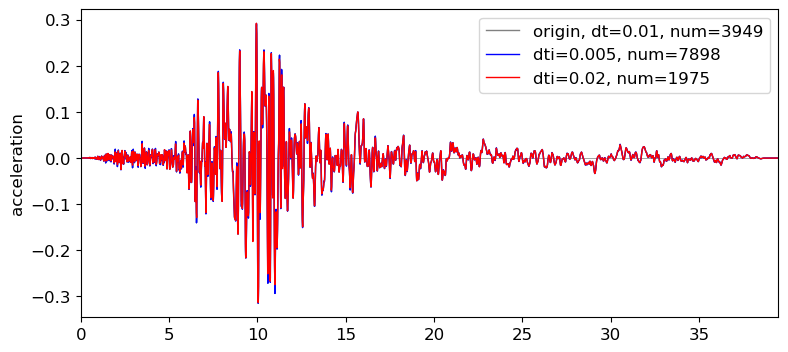

In [7]:
ts, acc = gm.load_gm_examples('Imperial_Valley')
dt = ts[1] - ts[0]
dtis = [dt / 2, 2 * dt]

colors = ['b', 'r']
fig, ax = plt.subplots(figsize=(9, 4))
ax.hlines(0, np.min(ts), np.max(ts), lw=0.5, colors='gray')
ax.plot(ts, acc, c='gray', lw=1,
        label=f"origin, dt={dt}, num={len(ts)}", alpha=1)
for i, dti in enumerate(dtis):
    ts2, acc2 = gm.resample(dt, acc, dti)
    ax.plot(ts2, acc2, c=colors[i], lw=1, alpha=1,
            label=f"dti={dti}, num={len(ts2)}")
ax.set_xlim(np.min(ts), np.max(ts))
ax.grid(False)
ax.set_ylabel('acceleration', fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.show()

# Linear Dynamic Time-History Analysis of SDOF System via Fast Fourier Transform.

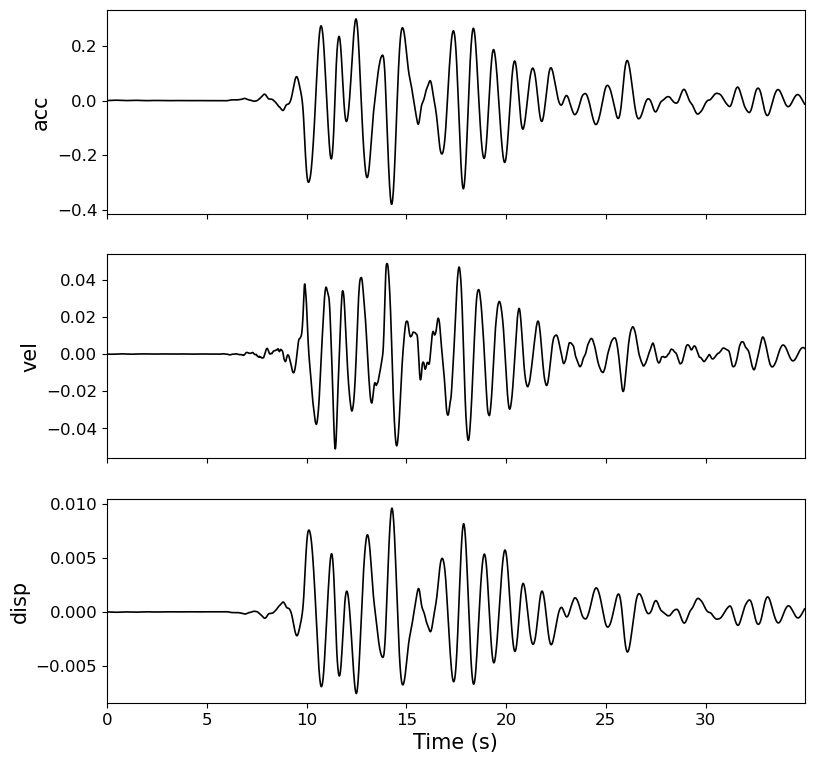

In [23]:
ts, acc = gm.load_gm_examples('Kocaeli')
dt = ts[1] - ts[0]
T = 1
omega = np.pi * 2 / T
u, v, d = gm.lida(dt, acc, omega=omega, damp_ratio=0.05, plot=True)

# SeismoGM

acc-unit: g; vel-unit；cm/s; disp-unit: cm


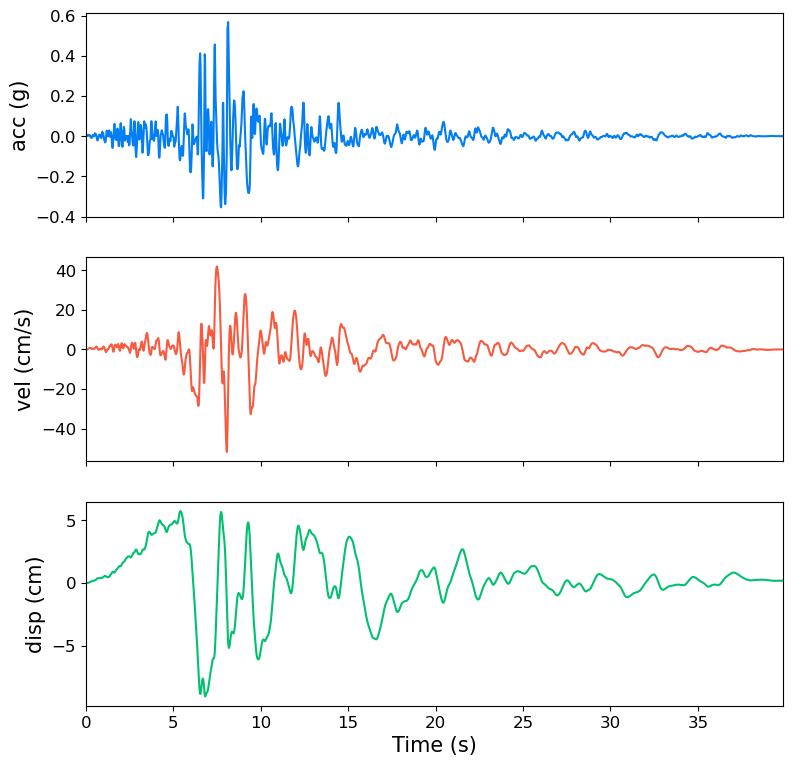

In [9]:
ts, acc = gm.load_gm_examples('Northridge')
dt = ts[1] - ts[0]
GM = gm.SeismoGM(dt=dt, acc=acc, unit='g')
GM.plot_hist()

In [10]:
ims = GM.get_ims()
for key, values in ims.items():
    print(f"{key}={values}")

PGA=0.5683
PGV=51.82672049999995
PGD=9.032285272500053
V_A=0.09296234383248275
D_V=0.17427854175145158
EDA=0.5776752524273202
Ia=2.7320995272500634
Ima=0.09360928546408732
MIV=64.04996170998503
Arms=0.06667702912088362
Vrms=7.2749105542292964
Drms=2.3803290574561173
Pa=0.017597971501103763
Pv=202.13375911643985
Pd=15.674306118966696
Ra=1.1851684590626854
Rv=28.989334661959276
Rd=18.83649413729276
SED=2110.6220240528282
If=89.94055229835642
Ic=0.10872813442310823
Icm=5.905344725765972
CAV=1292.7985875
CAD=157.85823057750014
CAI=62.93109335952491
CAVstd=1.2414815000000001
Ip=24.920584121306884
Tsig_5_95=9.069999999999999
Tsig_5_75=3.8899999999999997
Tbd=23.08
Tud=11.902774785219124


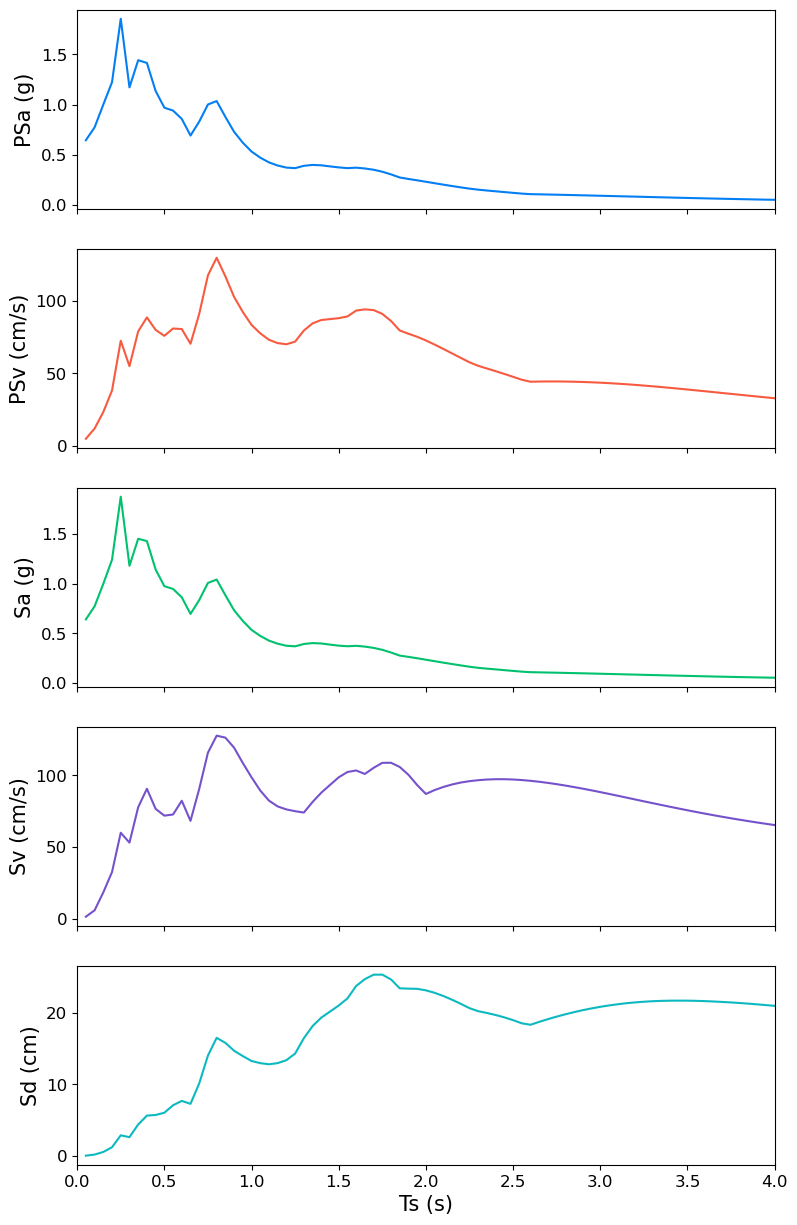

In [11]:
Ts = np.arange(0.05, 4.05, 0.05)
spectra = GM.get_elas_spec(Ts=Ts, damp_ratio=0.05, plot=True)

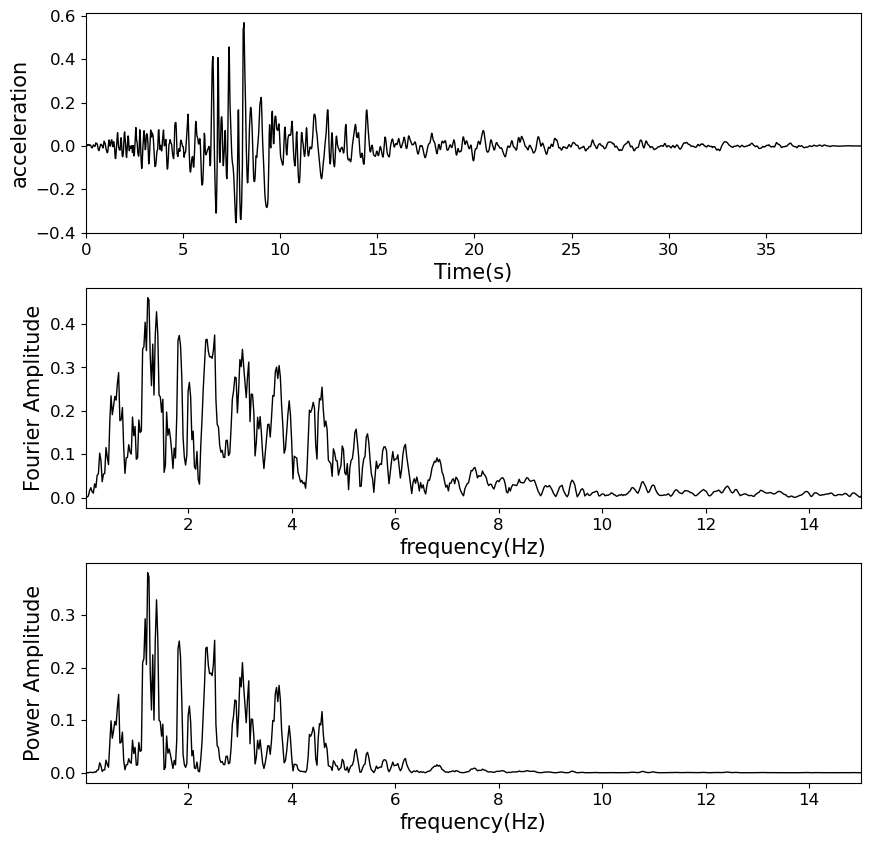

In [12]:
output = GM.get_fou_pow_spec(plot=True)

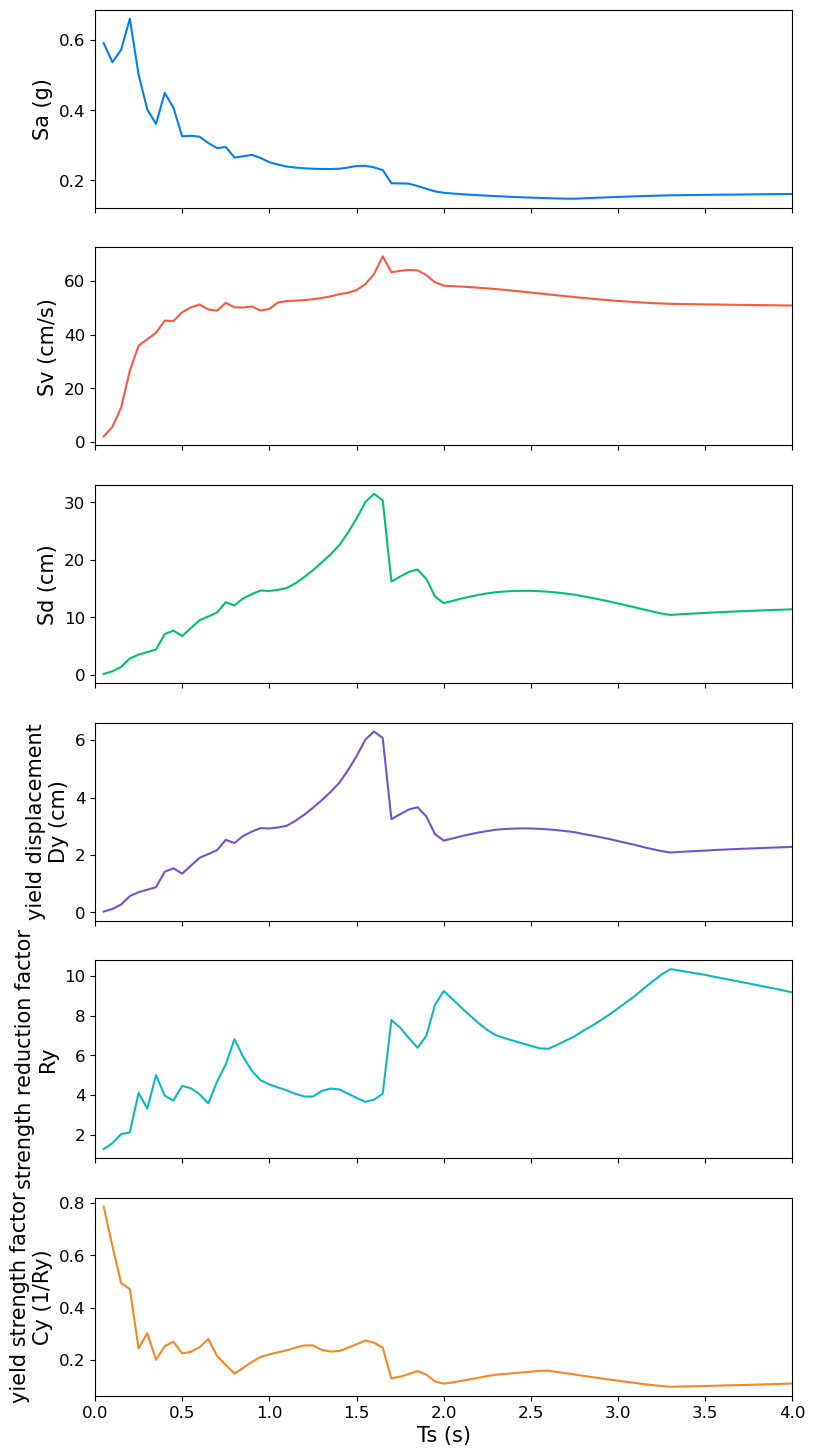

In [13]:
output = GM.get_const_duct_spec(Ts=Ts, harden_ratio=0.0, damp_ratio=0.05, mu=5, plot=True)

In [14]:
1/6

0.16666666666666666

In [15]:
GM.get_sac(T1=1)

0.35495846815217114

In [16]:
GM.get_savam(T1=1, T2=0.75, T3=2)

0.5024179810591735

In [17]:
GM.get_samp(T1=1, T2=0.75, m1=0.2, m2=0.1)

0.6604615458534404

In [18]:
Tavg = np.arange(0.05, 4.05, 0.05)
GM.get_avgsavd(Tavg=Tavg)

array([ 0.23586776, 77.24200569, 13.54999167])

In [19]:
GM.get_savdp()

array([  1.99111064, 131.66901656,  25.36622171])

In [20]:
GM.get_avdsi()

array([  0.50384894, 210.6503441 ,  30.70334309])

In [21]:
GM.get_hsi()

76.26728922485613

In [22]:
GM.get_epavd()

array([ 0.49683476, 38.27570156,  8.18487611])